In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys, os

# Helpers
abspath = os.path.abspath
dirname = os.path.dirname
sep = os.sep

# Update sys.path for in-house libraries
folder_ = dirname(abspath(os.getcwd()))
for i in range(1): folder_ = dirname(folder_)
sys.path.append(folder_)

# In-house libraries
import src.utils.mining_data_tb as md
import src.utils.folder_tb as fo

In [2]:
# Path to data
data_path = fo.path_to_folder(2,"data" + sep + "environment")

In [3]:
# Loading data
nutrition_df = pd.read_csv(data_path + "nutritional_values.csv", index_col = 0)
daily_intakes_df = pd.read_csv(data_path + "daily_intakes.csv")

# Some extra tweaking
nutrition_df.set_index("Food name", inplace = True)

In [4]:
nutrition_df.head(2)

,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg)",Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,"Sugars, total (g)",Carbohydrate (g),Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg),Category 2,Category 3
Food name,,,,,,,,,,,,,,,,,,,,,
"Milk, human",9602,Human milk,1.03,87.50,0.0,61,0.014,0.036,0.177,0.011,...,6.89,6.89,4.38,2.009,1.658,0.497,14,0.1,Milks,Animal-based
"Milk, NFS",1004,"Milk, reduced fat",3.34,89.04,0.0,59,0.057,0.137,0.110,0.060,...,4.89,4.87,1.99,1.164,0.426,0.065,8,1.1,Milks,Animal-based


In [5]:
daily_intake_nutrients = ["Protein (g)", "Water (g)", "Fiber, total dietary (g)", "Vitamin A, RAE (mcg)", "Thiamin (mg)", "Riboflavin (mg)", "Niacin (mg)", "Vitamin B-6 (mg)", "Vitamin B-12 (mcg)", "Folate, total (mcg)", "Vitamin C (mg)", "Calcium (mg)", "Iron (mg)", "Magnesium (mg)", "Potassium (mg)", "Sodium (mg)", "Zinc (mg)"]
food1 = nutrition_df.loc["Cauliflower, raw", daily_intake_nutrients]
food2 = nutrition_df.loc["Milk, human", daily_intake_nutrients]
foods = [food1, food2]

In [6]:
f_30 = md.daily_intake("female", 30)
f_30_daily_intake = f_30.get_data(daily_intakes_df)

In [7]:
comparator1 = md.comparator(foods, f_30_daily_intake)
to_plot = comparator1.to_plot()

,Daily Intake,"Cauliflower, raw","Milk, human","Relative - Cauliflower, raw","Relative - Milk, human"
Protein (g),46.0,1.92,1.03,4.173913,2.23913
Water (g),2100.0,92.07,87.5,4.384286,4.166667
"Fiber, total dietary (g)",25.0,2.0,0.0,8.0,0.0
"Vitamin A, RAE (mcg)",700.0,0,61,0.0,8.714286
Thiamin (mg),1.1,0.05,0.014,4.545455,1.272727
Riboflavin (mg),1.1,0.06,0.036,5.454545,3.272727
Niacin (mg),14.0,0.507,0.177,3.621429,1.264286
Vitamin B-6 (mg),1.3,0.184,0.011,14.153846,0.846154
Vitamin B-12 (mcg),2.4,0.0,0.05,0.0,2.083333
"Folate, total (mcg)",400.0,57,5,14.25,1.25


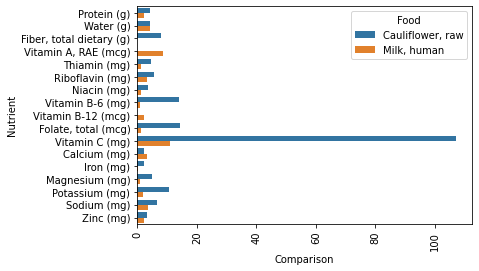

In [8]:
palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.barplot(x = "Comparison", y = "Nutrient", hue = "Food", data = to_plot)
plt.xticks(rotation = 90)
plt.show()